# <center>Ejercicio de machine learning: clasificación y regresión vinícola
## <center><font color='blue'>Luis F. Blanco Torres</font>

En este ejercicio (mucho menos guiado que los anteriores) vas a tener dos objetivos. Para ello, utilizarás un dataset sobre distintos vinos con sus características (como pueden ser la acidez, densidad...). Tendrás que generar, entrenar, validar y testear modelos tanto de clasificación como de regresión.

El dataset proviene de la Universdad de Minho, generado por [P. Cortez](http://www3.dsi.uminho.pt/pcortez/Home.html) et al. Dicho dataset se encuentra en el [*UC Irvine Machine Learning Repository*](https://archive.ics.uci.edu/ml/index.html) ([aquí](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) está disponible; pero debes usar la versión adjunta en la misma carpeta que este documento). Adjunto la descripción del dataset:

```
Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None
```

Además de las 12 variables descritas, el dataset que utilizarás tiene otra: si el vino es blanco o rojo. Dicho esto, los objetivos son:

1. Separar el dataset en training (+ validación si no vas a hacer validación cruzada) y testing, haciendo antes (o después) las transformaciones de los datos que consideres oportunas, así como selección de variables, reducción de dimensionalidad... Puede que decidas usar los datos tal cual vienen también...
2. Hacer un modelo capaz de clasificar lo mejor posible si un vino es blanco o rojo a partir del resto de variables (vas a ver que está chupado conseguir un muy buen resultado).
3. Hacer un modelo regresor que prediga lo mejor posible la calidad de los vinos.

El fichero csv a utilizar `winequality.csv` tiene las cabeceras de cuál es cada variable, y los datos están separados por punto y coma.

Siéntete libre de hacer todo el análisis exploratorio y estadístico (así como gráficos) que quieras antes de lanzarte a hacer modelos.

Y nada más. ¡Ánimo!

# <font color='brown'>0. Carga de librerías:</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use("ggplot")
random_state=123

# <font color='brown'>0.1. Carga y primer acercamiento a los datos:</font>

In [2]:
ds = pd.read_csv("C:/Users/Luis/Desktop/prácticas_datahack/Mod_2_Machine_Learning_Python/data/winequality.csv", sep=";",low_memory=False)
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.40,0.18,0.30,10.4,0.045,44.0,174.0,0.99660,3.11,0.57,9.7,6,white
6493,6.20,0.27,0.49,1.4,0.050,20.0,74.0,0.99310,3.32,0.44,9.8,6,white
6494,6.90,0.13,0.28,13.3,0.050,47.0,132.0,0.99655,3.34,0.42,10.1,6,white
6495,7.00,0.24,0.36,4.9,0.083,10.0,133.0,0.99420,3.33,0.37,10.8,6,white


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


<font color='brown'>Vamos a comprobar que nuestra label "Color", sólo contiene dos registros("white","red").</font>

In [4]:
ds["color"].unique()

array(['red', 'white'], dtype=object)

<font color='brown'>Antes de seguir comprobamos que no haya duplicados.</font>

In [5]:
duplicados=ds[ds.duplicated(keep=False)]
duplicados

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white
5,5.70,0.22,0.20,16.0,0.044,41.0,113.0,0.99862,3.22,0.46,8.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,6.70,0.41,0.34,9.2,0.049,29.0,150.0,0.99680,3.22,0.51,9.1,5,white
6488,6.90,0.15,0.28,4.4,0.029,14.0,107.0,0.99347,3.24,0.46,10.4,8,white
6489,6.00,0.29,0.25,1.4,0.033,30.0,114.0,0.98794,3.08,0.43,13.2,6,white
6491,6.80,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white


<font color='brown'>Eliminamos los duplicados y reiniciamos los índices.</font>

In [6]:
ds.drop_duplicates(inplace=True)
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,7.50,0.27,0.31,5.8,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5,white
6492,7.40,0.18,0.30,10.4,0.045,44.0,174.0,0.99660,3.11,0.57,9.7,6,white
6493,6.20,0.27,0.49,1.4,0.050,20.0,74.0,0.99310,3.32,0.44,9.8,6,white
6494,6.90,0.13,0.28,13.3,0.050,47.0,132.0,0.99655,3.34,0.42,10.1,6,white


In [7]:
ds.reset_index(drop=True, inplace=True)
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,7.50,0.27,0.31,5.8,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5,white
5316,7.40,0.18,0.30,10.4,0.045,44.0,174.0,0.99660,3.11,0.57,9.7,6,white
5317,6.20,0.27,0.49,1.4,0.050,20.0,74.0,0.99310,3.32,0.44,9.8,6,white
5318,6.90,0.13,0.28,13.3,0.050,47.0,132.0,0.99655,3.34,0.42,10.1,6,white


<font color='brown'>Aunque ya hemos visto que no tenemos nulos al ejecutar .info, vamos a cerciorarnos con dos métodos:</font>

In [8]:
ds.isnull().values.any()

False

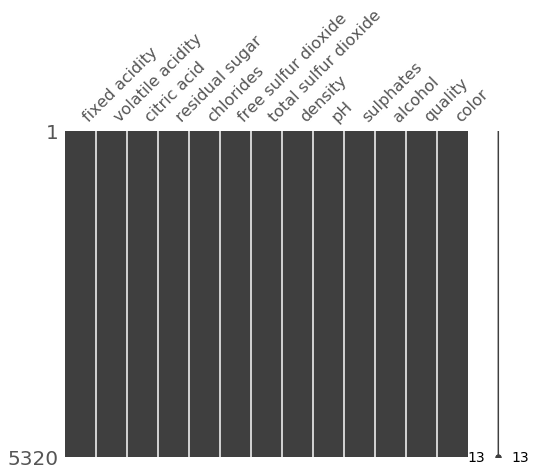

In [9]:
missingno.matrix(ds, figsize=(8,6))
pass

<font color='brown'>No tenemos NaN ni valores missing en nuestro dataset.</font>

<font color='brown'>Vamos a analizar la label "color":</font>

In [10]:
ds["color"].value_counts("red")

white    0.744549
red      0.255451
Name: color, dtype: float64

<font color='brown'>Vemos que existen tres veces más datos para vino blanco. Cuando realicemos el reparto entre train y test tendremos en cuenta esta proporción:</font>

# <font color='brown'>0.2. EDA (Análisis exploratorio de los datos):</font>

<font color='brown'>Realizamos un análisis estadístico, ayudándonos con gráficos, para comprender como se comportan las variables numéricas del dataset.</font>

In [11]:
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<font color='brown'>De un primer vistazo observamos que vamos a tener que escalar las variables, ya que tenemos grandes diferencias de escala entre ellas.
Para ver más claro como se distribuyen nuestras variables vamos a representar gráficamente los histogramas de cada una de ellas, así como las correlaciones entre cada par de variables. Para facilitar la labor, vamos a crear una variable que contenga todas las features.</font>

In [12]:
features=[i for i in ds[:]][0:11]
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

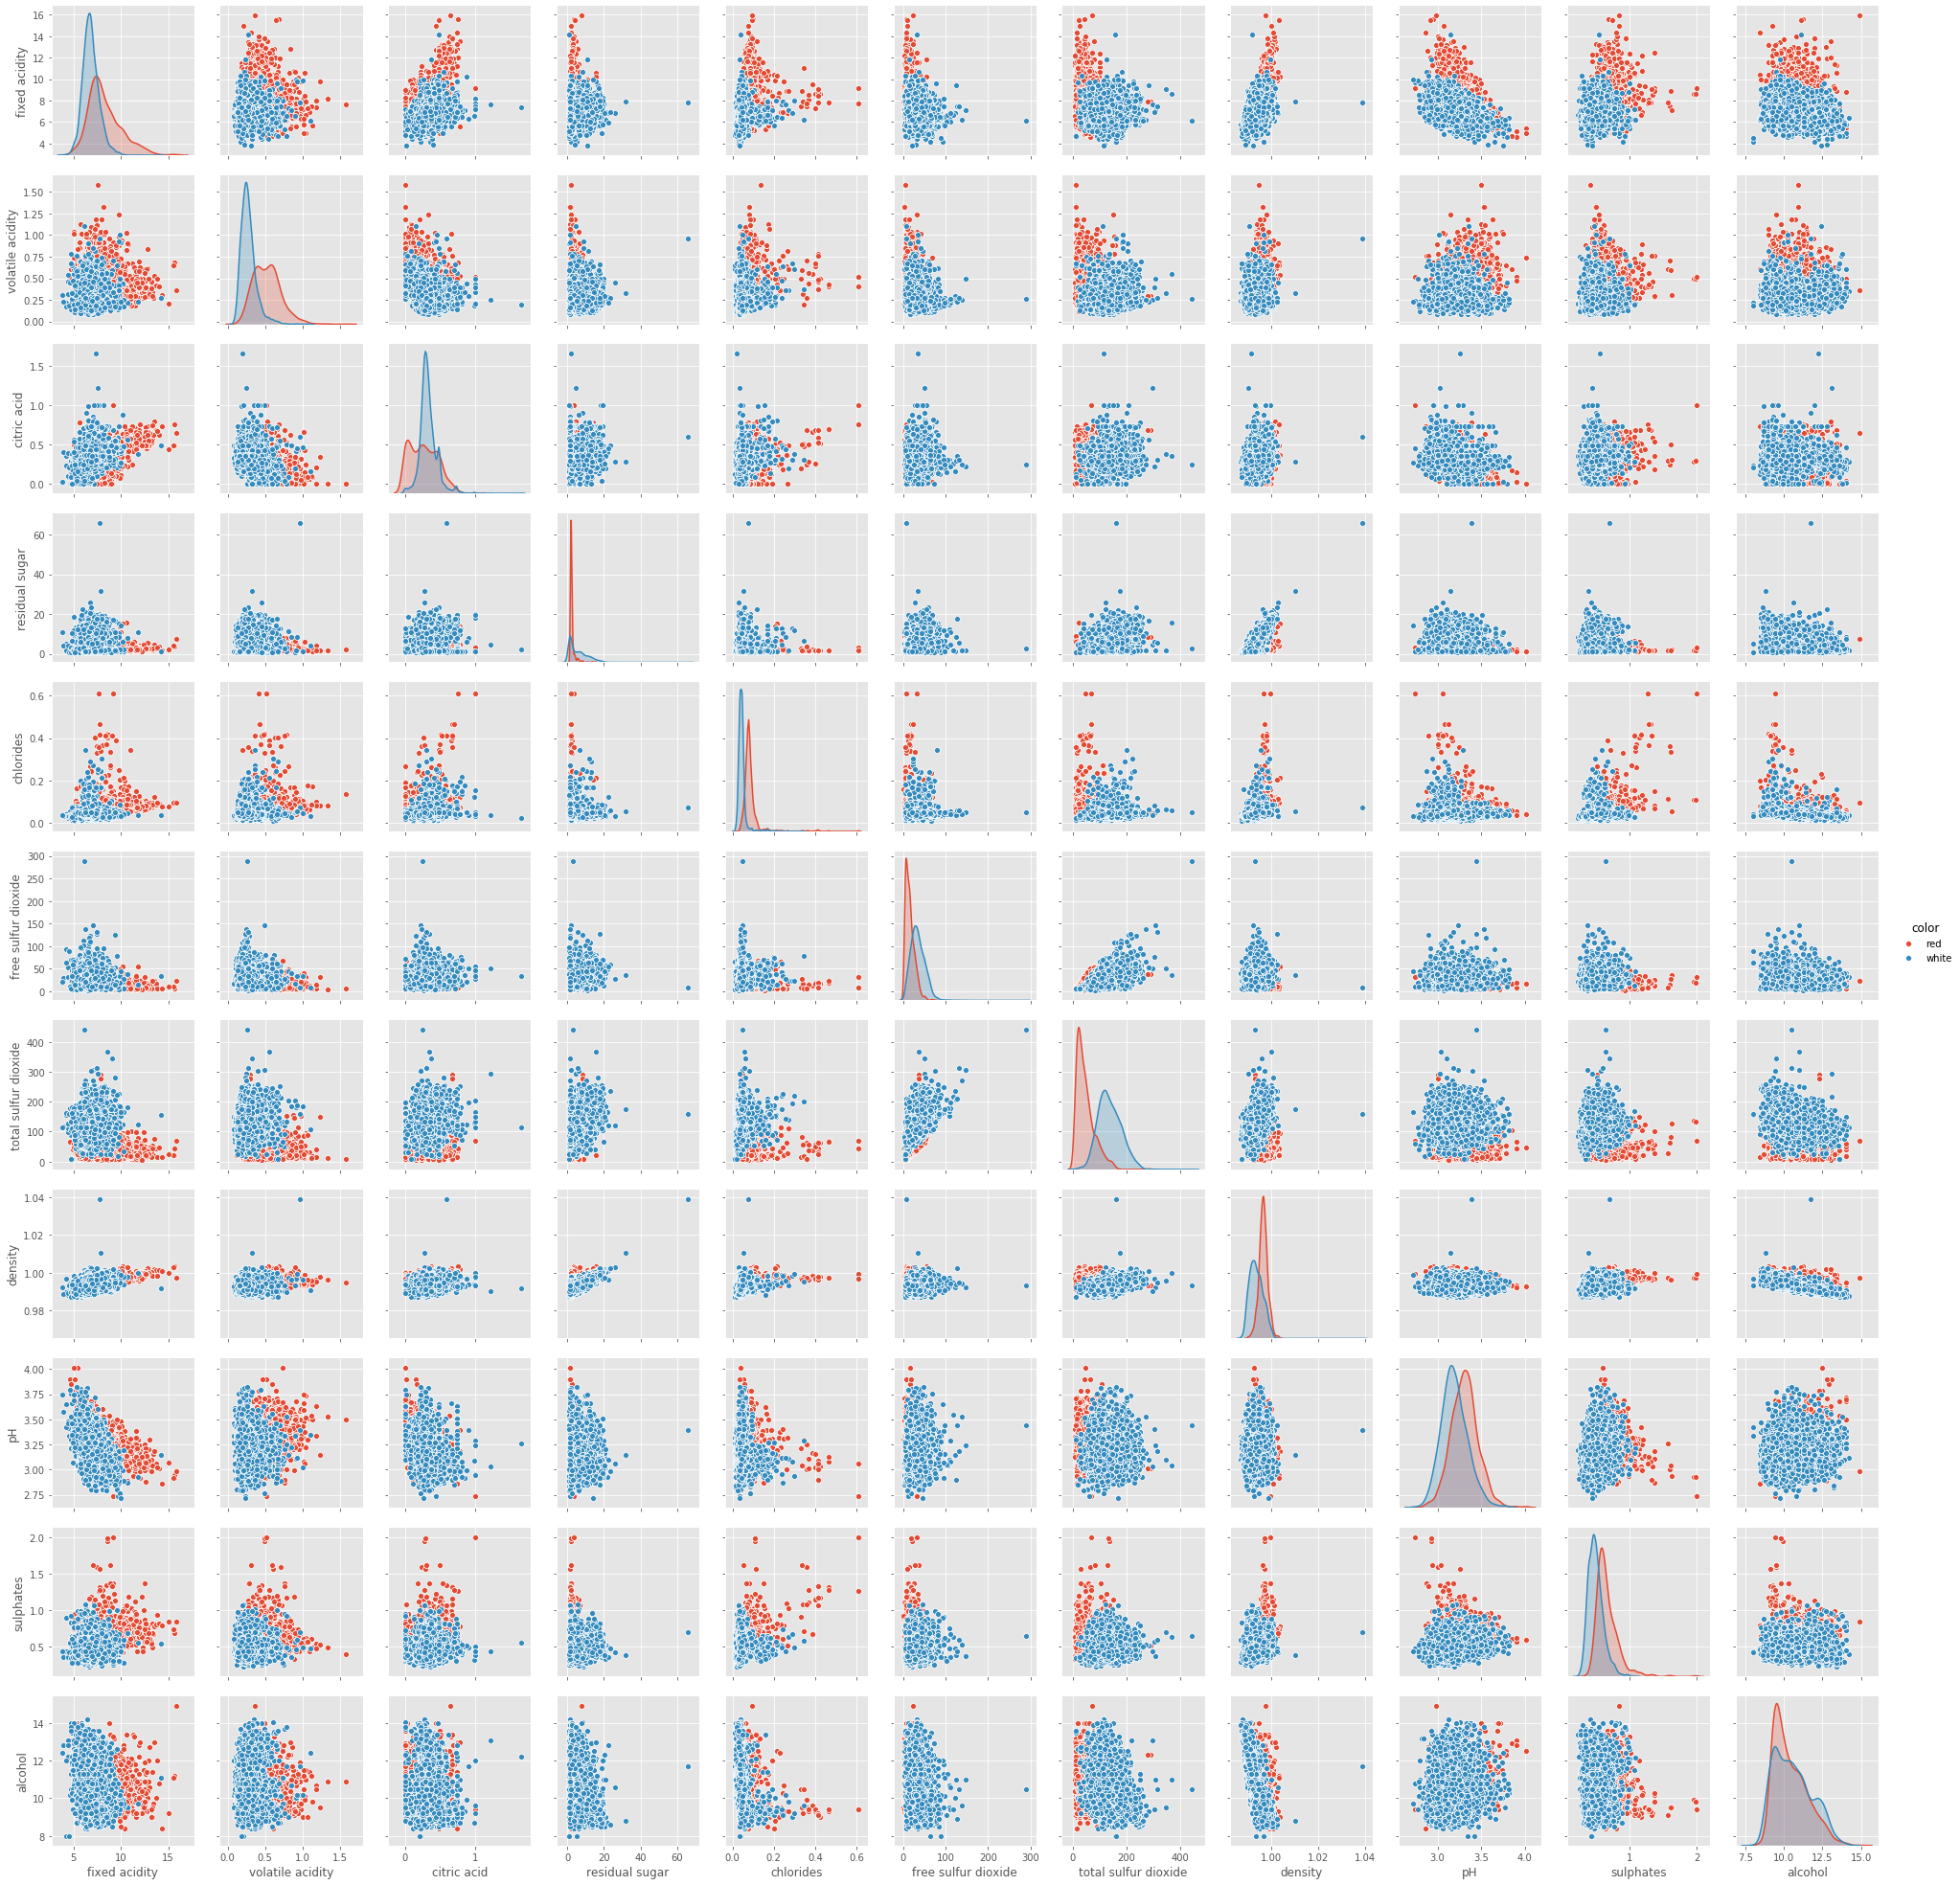

In [13]:
sns.pairplot(ds, 
             hue=("color"),
             vars=(features))
pass

<font color='brown'>En la diagonal, podemos ver los histogramas de cada features. En general, nos encontramos con una asimetría positiva en la mayor parte de nuestras features. Esto puede acarrearnos problemas con nuestros modelos, que tienen un mejor funcionamiento con distribuciones normales. Además, podemos ver algunos registros que podríamos considerar como outliers.</font>

<font color='brown'>Vamos a analizar la matriz de correlaciones entre cada par de features. Nos ayudaremos de un heatmap para comprobar visualmente si existen valores que están correlacionados</font>

In [14]:
matriz_corr=ds[features].corr()
matriz_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232


<font color='brown'>Como no resulta fácil analizar los gráficos, vamos a realizar un mapa de calor que nos represente la correlación entre cada par de variables.</font>

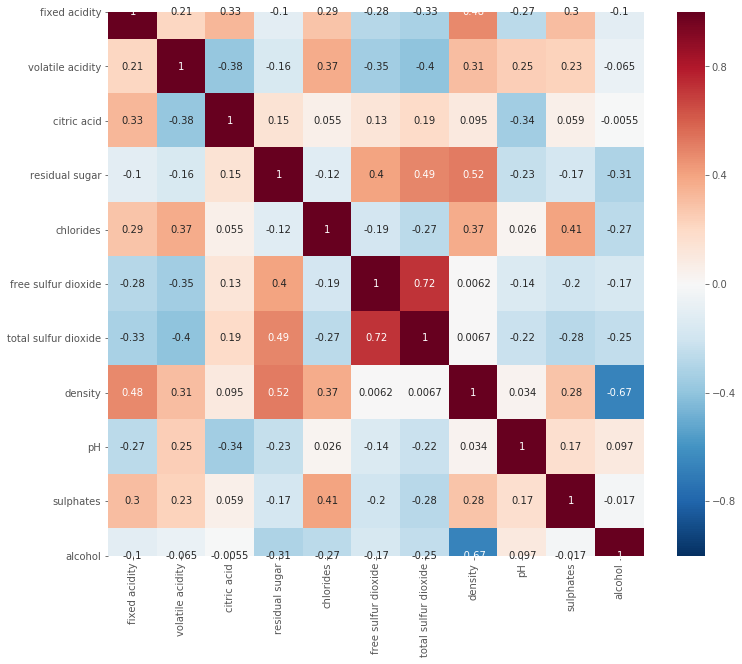

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(matriz_corr,
            vmin=-1.0,
            vmax=1.0,
            annot=True,
            cmap="RdBu_r")
pass

<font color='brown'>La mayor correlación se da entre las features "total sulfur dioxide" y "free sulfur dioxide", normal al ser dos features que están midiendo lo mismo, la cantidad de dióxido de azufre. También existe correlación, aunque en este caso negativa, entre el "alcohol" y la "densidad". En cualquier caso, lo tendremos en cuenta una vez hayamos realizado la división train-test. En este momento no podemos realizar ninguna acción para no desvirtuar los resultados de nuestros modelos en test.</font>

# <font color='brown'>1. Separación del dataset y tratamiento de los datos:</font>

<font color='brown'>Antes de dividir nuestro dataset en train y test, debemos que transformar nuestra label categórica "color" en numérica. Aunque no sería necesario en todos los modelos (lo modelos de árboles permiten usar registros categóricos), como vamos a probar varios de ellos, pasaremos "color" a numérica.</font>

In [16]:
le=LabelEncoder()
le.fit(ds["color"])
ds["color_num"]=le.transform(ds["color"])
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,color_num
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red,0
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white,1
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white,1
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red,0
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,7.50,0.27,0.31,5.8,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5,white,1
5316,7.40,0.18,0.30,10.4,0.045,44.0,174.0,0.99660,3.11,0.57,9.7,6,white,1
5317,6.20,0.27,0.49,1.4,0.050,20.0,74.0,0.99310,3.32,0.44,9.8,6,white,1
5318,6.90,0.13,0.28,13.3,0.050,47.0,132.0,0.99655,3.34,0.42,10.1,6,white,1


In [17]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=random_state)
for train_index, test_index in sss.split(ds, ds["color_num"]):
    train = ds.loc[train_index]
    test = ds.loc[test_index]

In [18]:
ds["color_num"].value_counts("0")

1    0.744549
0    0.255451
Name: color_num, dtype: float64

In [19]:
train["color_num"].value_counts("0")

1    0.744596
0    0.255404
Name: color_num, dtype: float64

In [20]:
test["color_num"].value_counts("0")

1    0.744361
0    0.255639
Name: color_num, dtype: float64

<font color='brown'>Ya tenemos un dataFrame numérico, donde "red" toma valor 0 y "white" toma valor 1, en la misma proporción que en nuestro dataset.</font>

<font color='brown'>Vamos a observar algunos de nuestros datos de train y test:</font>

In [21]:
train[:4]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,color_num
4308,7.2,0.40,0.49,1.10,0.048,11.0,138.0,0.9929,3.01,0.42,9.3,5,white,1
1477,8.4,0.58,0.27,12.15,0.033,37.0,116.0,0.9959,2.99,0.39,10.8,6,white,1
4964,6.9,0.24,0.49,1.30,0.032,35.0,148.0,0.9932,3.45,0.57,10.7,7,white,1
3920,7.3,0.45,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5,red,0


In [22]:
test[:4]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,color_num
4784,5.6,0.225,0.24,9.8,0.054,59.0,140.0,0.99545,3.17,0.39,10.2,6,white,1
2330,9.2,0.755,0.18,2.2,0.148,10.0,103.0,0.99690,2.87,1.36,10.2,6,red,0
1779,6.6,0.210,0.29,1.8,0.026,35.0,128.0,0.99183,3.37,0.48,11.2,6,white,1
2376,8.7,0.340,0.46,13.8,0.055,68.0,198.0,0.99880,3.36,0.37,9.5,6,white,1


In [23]:
X_train=train[train.columns[:-3]]
y_train=train[train.columns[-1]]
X_test=test[test.columns[:-3]]
y_test=test[test.columns[-1]]

<font color='brown'>Es el momento de realizar el pre-procesado de los elementos del train:  
- ***Descartar variables por alta correlación:*** como hemos visto en nuestro análisis inicial, existen correlaciones entre dos pares de features, pero no vamos a descartar ninguna variable al no tener gran cantidad de ellas.  
- ***Tratamiento de outliers:*** como pudimos ver en el pairplots del análisis inicial, tenemos evidencias de la presencia de outliers. En este punto, vamos a representar los boxplots de las features para comprobar la presencia de outliers y a contabilizarlos para ver si es necesario tratarlos.
- ***Estandarización de las features:*** para algunos modelos será necesario, al igual que con los outliers, hemos observado diferencias de escala que pueden perjudicar al correcto aprendizaje de los modelos planteados.  
- ***Selección de features:*** aunque algunos modelos, en su aprendizaje, ya realizan esta selección (como los árboles de decisión y sus ensembles), no es necesario reducir la dimensionalidad de las features al tener un número pequeño. Aún así, lo realizaremos por motivos académicos.  

Vamos a realizar Cross Validation y Grid Search, por lo que el pre-procesado de los datos del train se llevarán a cabo en una pipeline, que se encrustará dentro del proceso del Grid Search para cada modelo, si este pre-procesado fuera necesario.</font>

### <font color='brown'>Tratamiento de outliers:</font>

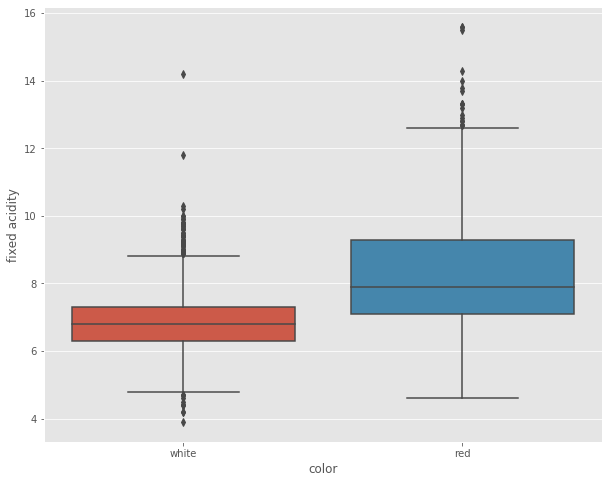

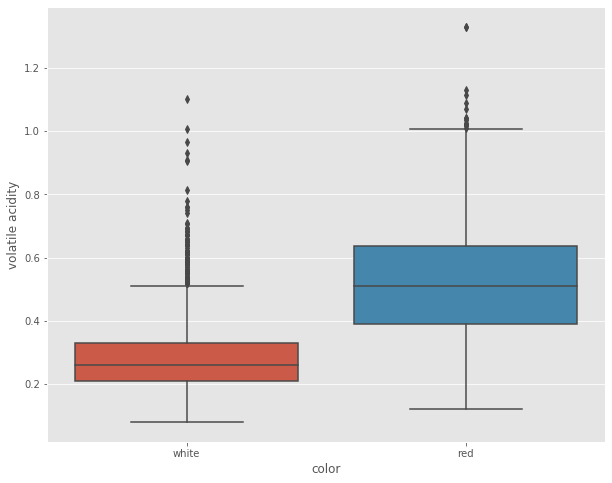

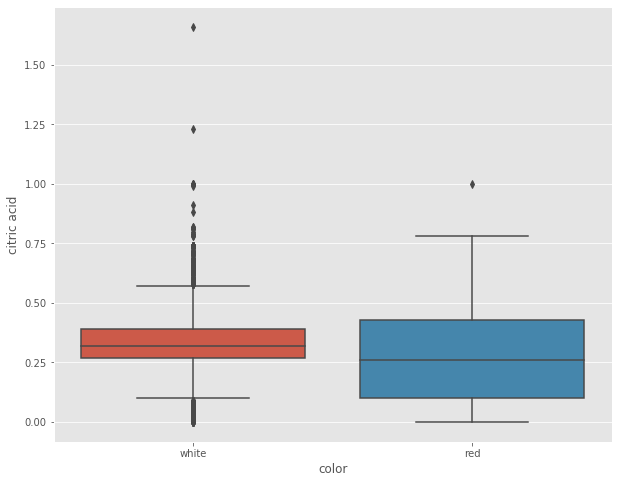

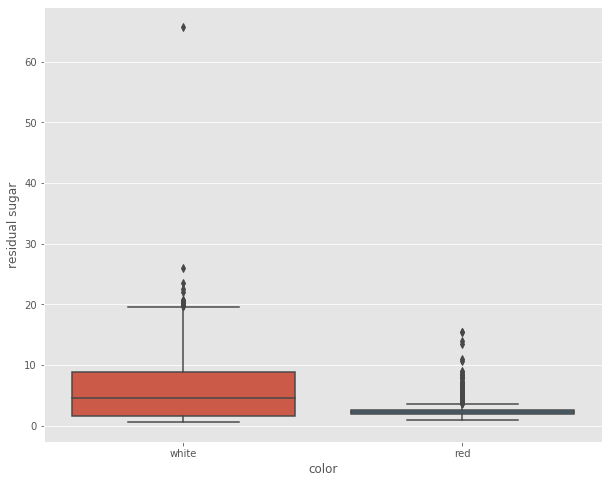

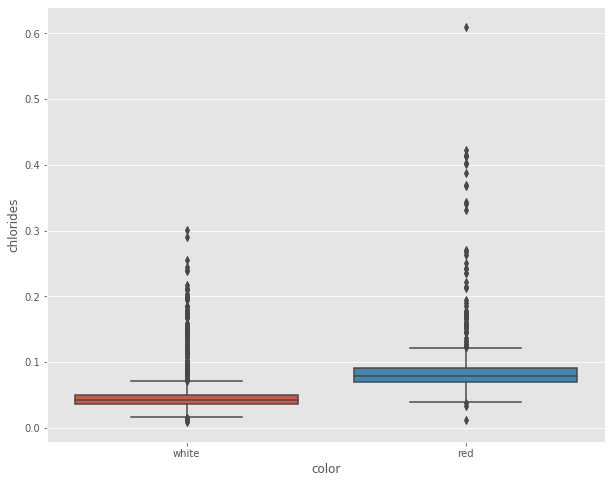

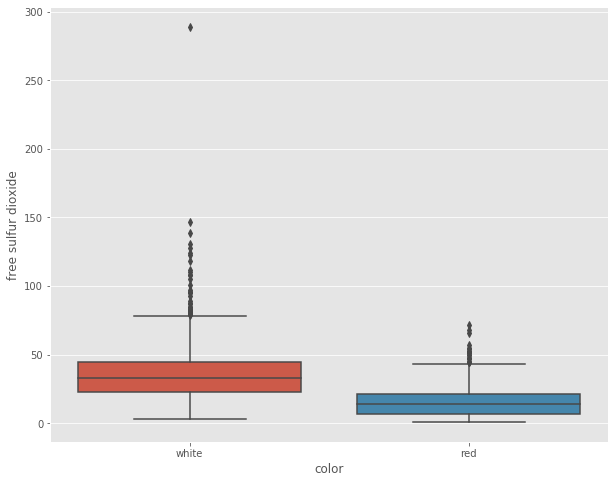

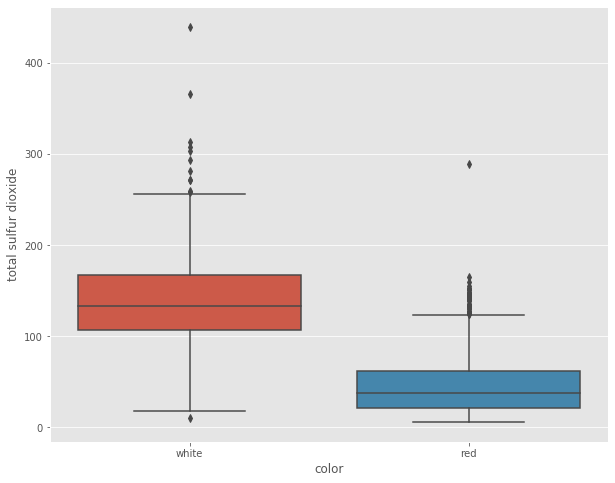

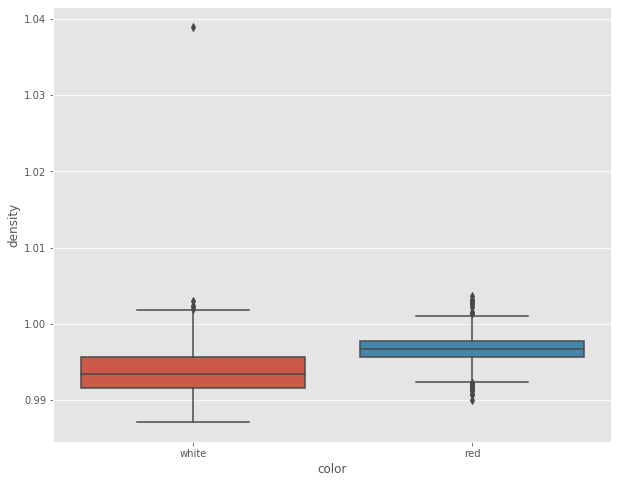

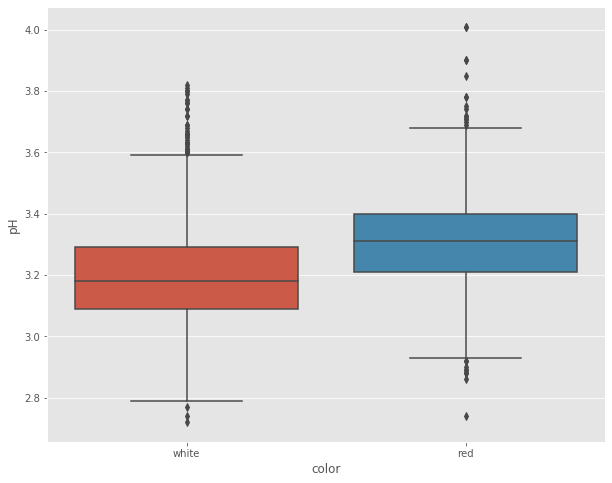

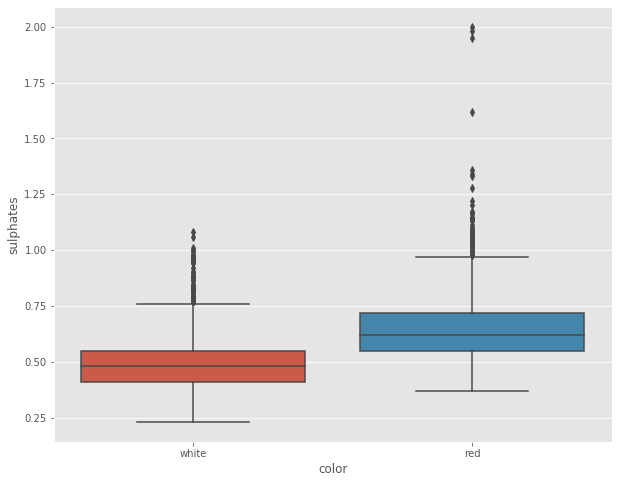

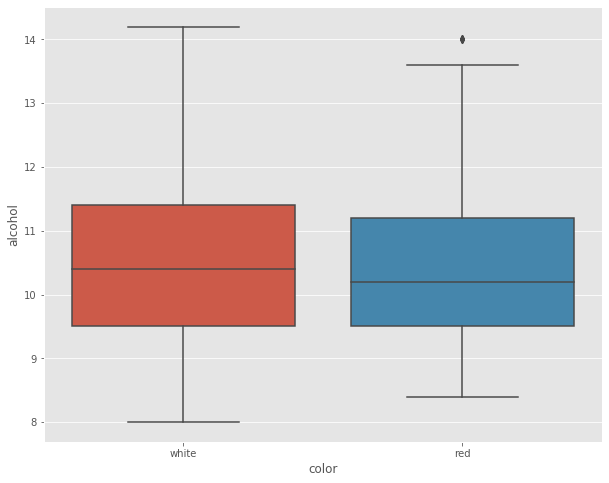

In [24]:
for i in range(0,11):
    plt.figure(figsize=(10,8))
    sns.boxplot(y=train[features[i]],x=train["color"])

<font color='brown'>Ahora ya podemos ver de una manera más clara, las features que tienen outliers, pero vamos a analizarlo numéricamente mediante el método de Ratio Intercuartílico:</font>

In [25]:
for i in features:
    # Calculamos el rango intercuartílico
    IQR = train[i].quantile(0.75) - train[i].quantile(0.25)
    # Calculamos el límite superior (normal y extremo)
    limSup = train[i].quantile(0.75) + (IQR *  1.5)
    limSupExt = train[i].quantile(0.75) + (IQR *  3)
    # Calculamos el límite inferior (normal y extremo)
    limInf = train[i].quantile(0.25) - (IQR *  1.5)
    limInfExt = train[i].quantile(0.25) - (IQR *  3)
    # Total de observaciones
    total = train[i].shape[0]
    # Examinamos el límite superior
    outliers_limite_superior= (train[train[i] > limSup].shape[0]/total)*100
    print("El límite superior de %s es: "%i, outliers_limite_superior,"%")
    # Examinamos el límite superior extremo
    outliers_limite_superior_extremo=(train[train[i] > limSupExt].shape[0]/total)*100
    print("El límite superior extremo de %s es: "%i, outliers_limite_superior_extremo,"%")
    # Examinamos el límite inferior
    outliers_limite_inferior=(train[train[i] < limInf].shape[0]/total)*100
    print("El límite inferior de %s es: "%i, outliers_limite_inferior,"%")
    # Examinamos el límite inferior extremo
    outliers_limite_inferior_extremo=(train[train[i] < limInfExt].shape[0]/total)*100
    print("El límite inferior extremo de %s es: "%i, outliers_limite_inferior_extremo,"%")
    print(" ")

El límite superior de fixed acidity es:  5.897556390977444 %
El límite superior extremo de fixed acidity es:  1.3157894736842104 %
El límite inferior de fixed acidity es:  0.14097744360902253 %
El límite inferior extremo de fixed acidity es:  0.0 %
 
El límite superior de volatile acidity es:  4.910714285714286 %
El límite superior extremo de volatile acidity es:  0.6343984962406015 %
El límite inferior de volatile acidity es:  0.0 %
El límite inferior extremo de volatile acidity es:  0.0 %
 
El límite superior de citric acid es:  3.148496240601504 %
El límite superior extremo de citric acid es:  0.2349624060150376 %
El límite inferior de citric acid es:  3.9943609022556394 %
El límite inferior extremo de citric acid es:  0.0 %
 
El límite superior de residual sugar es:  2.9605263157894735 %
El límite superior extremo de residual sugar es:  0.046992481203007516 %
El límite inferior de residual sugar es:  0.0 %
El límite inferior extremo de residual sugar es:  0.0 %
 
El límite superior

<font color='brown'>Comprobamos que el porcentaje de outliers para todas las features no es muy elevado, siendo el mayor el límite superior extremo de chlorides 2.16%, por lo que vamos a dejarlos. Si observamos que ninguno de nuestros modelos nos aporta buenos resultados, probaremos a tratar los outliers.</font>

# <font color='brown'>2. Modelo de clasificación de vino blanco o tinto:</font>

<font color='brown'>A continuación, vamos a generar todos nuestros modelos, cada uno de ellos tendrá un tratamiento diferente de los datos según sus características. Además, realizaremos pipelines con los hiperparámetros a probar en cada modelo y el Grid Search:</font>

<font color='brown'> 2.1. Modelos de Árboles: por sus propias características no necesitan que se seleccionen features ni su estandarización.</font>

- <font color='brown'> Árbol de decisión</font>

In [26]:
arbol=DecisionTreeClassifier(random_state=random_state)

grid_arbol={"max_depth":list(range(1,11))}

gs_arbol=GridSearchCV(arbol,
                      grid_arbol,
                      cv=5,
                      scoring="accuracy",
                      verbose=1,
                      n_jobs=-1)

- <font color='brown'> Random Forest</font>

In [27]:
random_forest=RandomForestClassifier(random_state=random_state)

grid_random_forest={"n_estimators": [150],
                    "max_depth": [3,5,10,15,20],
                    "max_features": ["sqrt", 3, 4]}

gs_random_forest=GridSearchCV(random_forest,
                              grid_random_forest,
                              cv=5,
                              scoring="accuracy",
                              verbose=1,
                              n_jobs=-1)

- <font color='brown'> Gradient Boosting</font>

In [28]:
gradient_boosting=GradientBoostingClassifier(random_state=random_state)

grid_gradient_boosting={"loss": ["deviance"],
                        "learning_rate": [0.05, 0.1, 0.5],
                        "n_estimators": [20,50,100,200],
                        "max_depth": [1,2,3,4,5],
                        "subsample": [1.0, 0.8, 0.5],
                        "max_features": ["sqrt", 3, 4]}

gs_gradient_boosting=GridSearchCV(gradient_boosting,
                                  grid_gradient_boosting,
                                  cv=5,
                                  scoring="accuracy",
                                  verbose=1,
                                  n_jobs=-1)

- <font color='brown'> Extra Trees</font>

In [29]:
extra_tree=ExtraTreesClassifier(random_state=random_state)

grid_extra_tree={"max_depth":[2,5,10],
                 "n_estimators":[5,10,50]}

gs_extra_tree=GridSearchCV(extra_tree,
                           grid_extra_tree,
                           cv=5,
                           scoring="accuracy",
                           verbose=1,
                           n_jobs=-1)

<font color='brown'> 2.2. Regresión Logística: crearemos dos modelos, uno sin seleccionador de features y otro con él (RFECV). Ambos son sensibles a la estandarización por lo que se incluirá en cada uno de los pipelines un StandardScaler:</font>

- <font color='brown'> Regresión Logística sin seleccionador</font>

In [30]:
logreg=Pipeline(steps=[("scaler",StandardScaler()),
                       ("logreg",LogisticRegression(random_state=random_state))])

grid_logreg={"logreg__penalty": ["l1","l2"],
             "logreg__C": [0.1, 0.5, 1.0, 5.0],
             "logreg__fit_intercept": [True],
             "logreg__max_iter": [50,100,500],
             "logreg__solver": ["liblinear"]}

gs_logreg=GridSearchCV(logreg,
                       grid_logreg,
                       cv=5,
                       scoring="accuracy",
                       verbose=1,
                       n_jobs=-1)

- <font color='brown'> Regresión Logística con seleccionador RFECV</font>

In [31]:
logreg_rfecv=Pipeline(steps=[("scaler",StandardScaler()),
                             ("rfecv",RFECV(estimator=LogisticRegression())),
                             ("logreg",LogisticRegression(random_state=random_state))])

grid_logreg_rfecv={"rfecv__step": [1],
                   "rfecv__cv": [5],
                   "logreg__penalty": ["l1","l2"],
                   "logreg__C": [0.1, 0.5, 1.0, 5.0],
                   "logreg__fit_intercept": [True],
                   "logreg__max_iter": [50,100,500],
                   "logreg__solver": ["liblinear"]}

gs_logreg_rfecv=GridSearchCV(logreg_rfecv,
                             grid_logreg_rfecv,
                             cv=5,
                             scoring="accuracy",
                             verbose=1,
                             n_jobs=-1)

<font color='brown'> 2.3. Nearest Neighborgs: crearemos dos modelos, uno sin seleccionador de features y otro con él (SelectKBest). Ambos son sensibles a la estandarización por lo que se incluirá en cada uno de los pipelines un StandardScaler:</font>

- <font color='brown'> Nearest Neighbors sin seleccionador</font>

In [32]:
neighbors=Pipeline(steps=[("scaler",StandardScaler()),
                          ("knn",KNeighborsClassifier())])

grid_neighbors={"knn__n_neighbors": [3,5,7,9,11],
                "knn__weights": ["uniform","distance"]}

gs_neighbors=GridSearchCV(neighbors,
                          grid_neighbors,
                          cv=5,
                          scoring="accuracy",
                          verbose=1,
                          n_jobs=-1)

- <font color='brown'> Nearest Neighborgs con seleccionador SelectKBest</font>

In [33]:
neighbors_kbest=Pipeline(steps=[("scaler",StandardScaler()),
                                ("kbest",SelectKBest()),
                                ("knn",KNeighborsClassifier())])

grid_neigbors_kbest={"kbest__score_func": [f_classif],
                     "kbest__k": [1,2,3],
                     "knn__n_neighbors": [3,5,7,9,11],
                     "knn__weights": ["uniform","distance"]}

gs_neighbors_kbest=GridSearchCV(neighbors_kbest,
                                grid_neigbors_kbest,
                                cv=5,
                                scoring="accuracy",
                                verbose=1,
                                n_jobs=-1)

<font color='brown'> 2.5. Naïve Bayes: crearemos dos modelos, uno sin seleccionador de features y otro con él (SelectKBest). No son sensibles a la estandarización:</font>

- <font color='brown'> Naïve Bayes sin seleccionador</font>

In [34]:
nb=GaussianNB()

#Sólo admite priors y no tenemos, por lo que no tiene hiperparámetros.

gs_nb=GridSearchCV(nb,
                   {},
                   cv=5,
                   scoring="accuracy",
                   verbose=1,
                   n_jobs=-1)

- <font color='brown'> Naïve Bayes con seleccionador SelectKBest</font>

In [35]:
nb_kbest=Pipeline(steps=[("kbest",SelectKBest()),
                         ("nb",GaussianNB())])

grid_nb_kbest={"kbest__score_func": [f_classif],
               "kbest__k": [1,2,3]}

gs_nb_kbest=GridSearchCV(nb_kbest,
                         grid_nb_kbest,
                         cv=5,
                         scoring="accuracy",
                         verbose=1,
                         n_jobs=-1)

<font color='brown'>Vamos a crear un diccionario con todos los GridSearchCV para facilitarnos observar el mejor modelo. Tendremos los pares de clave, un valor descriptivo y el valor (Accuracy):</font>

In [36]:
dict_grid_searchs={"gs_arbol":gs_arbol,
                  "gs_random_forest":gs_random_forest,
                  "gs_gradient_boosting":gs_gradient_boosting,
                  "gs_extra_tree":gs_extra_tree,
                  "gs_logreg":gs_logreg,
                  "gs_logreg_rfecv":gs_logreg_rfecv,
                  "gs_neighbors":gs_neighbors,
                  "gs_neighbors_kbest":gs_neighbors_kbest,
                  "gs_nb":gs_nb,
                  "gs_nb_kbest":gs_nb_kbest}

<font color='brown'>Vamos a iterar el diccionario dict_grid_search, y a entrenar nuestros modelos para obtener los scores (Accuracy):</font>

In [37]:
for nombre, grid_search in dict_grid_searchs.items():
    print("Haciendo Grid Search de %s..." %nombre)
    grid_search.fit(X_train, y_train)

Haciendo Grid Search de gs_arbol...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    4.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_random_forest...
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   17.7s finished


Haciendo Grid Search de gs_gradient_boosting...
Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 606 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1406 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1956 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2606 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  4.9min finished


Haciendo Grid Search de gs_extra_tree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s finished


Haciendo Grid Search de gs_logreg...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_logreg_rfecv...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.9s finished
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklea

C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Haciendo Grid Search de gs_neighbors...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_neighbors_kbest...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed:    1.9s


Haciendo Grid Search de gs_nb...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Haciendo Grid Search de gs_nb_kbest...
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished


<font color='brown'>Vamos a ver cuáles han sido los mejores scores de cada grid search de nuestros modelos. Vamos a incluirlos en una tabla, ordenados para ver cuál ha sido el mejor de una manera más simple:</font>

In [38]:
best_score_gridsearchs=[(nombre_modelo, grid_search.best_score_) for nombre_modelo, grid_search
                        in dict_grid_searchs.items()]

best_score_gridsearchs_df=pd.DataFrame(best_score_gridsearchs,columns=["GridSearchCV", "Mejor score"])

best_score_gridsearchs_df_ordenado=(best_score_gridsearchs_df.sort_values(by="Mejor score", ascending=False))
best_score_gridsearchs_df_ordenado

,GridSearchCV,Mejor score
2,gs_gradient_boosting,0.995301
3,gs_extra_tree,0.994361
1,gs_random_forest,0.993891
4,gs_logreg,0.993891
5,gs_logreg_rfecv,0.993421
6,gs_neighbors,0.993421
7,gs_neighbors_kbest,0.982143
0,gs_arbol,0.981908
8,gs_nb,0.968750
9,gs_nb_kbest,0.948308


<font color='brown'>Ya tenemos un modelo ganador "gs_gradient_boosting", vamos a comprobar qué hiperparametros han sido los mejores:</font>

In [39]:
mejor_gridsearch=dict_grid_searchs["gs_gradient_boosting"]

mejor_modelo=mejor_gridsearch.best_estimator_
mejor_modelo

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

<font color='brown'>A continuación, vamos a entrenar el modelo para todo nuestro conjunto de train, aunque GridSearchCV lo entrena automáticamente sobre todo el conjunto de train. Aún así lo reentrenamos:</font>

In [40]:
mejor_modelo.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

<font color='brown'>Vamos a ver como predice nuestro modelo en el conjunto de test. En primer lugar vamos a ver que Accuracy consigue, de esta forma podremos comprobbar que no ha habido overfitting o underfitting.</font>

In [41]:
accuracy_en_test=accuracy_score(y_true=y_test, y_pred=mejor_modelo.predict(X_test))

print("El modelo tiene un accuracy en el conjunto de test de %s" %accuracy_en_test)

El modelo tiene un accuracy en el conjunto de test de 0.993421052631579


<font color='brown'>Hemos obtenido un resultado de Accuracy excelente, y cercano al obtenido en train, con lo que concluimos que no hay indicios de overfitting o underfitting. A continuación, vamos a sacar las métricas de Recall, Precision y F1-Score. A continuación veremos la curva ROC.</font>

In [42]:
print("El modelo tiene un Recall Score en el conjunto de test de:",
      recall_score(y_true=y_test,y_pred=mejor_modelo.predict(X_test)))
print("El modelo tiene un Precision Score en el conjunto de test de:",
      precision_score(y_true=y_test,y_pred=mejor_modelo.predict(X_test)))
print("El modelo tiene un F1-Score en el conjunto de test de:",
      f1_score(y_true=y_test,y_pred=mejor_modelo.predict(X_test)))

El modelo tiene un Recall Score en el conjunto de test de: 0.9974747474747475
El modelo tiene un Precision Score en el conjunto de test de: 0.9937106918238994
El modelo tiene un F1-Score en el conjunto de test de: 0.9955891619407687


<font color='brown'>Todas las métricas nos idican que el modelo predice muy bien. Vamos a ver la curva ROC que pinta tiene:</font>

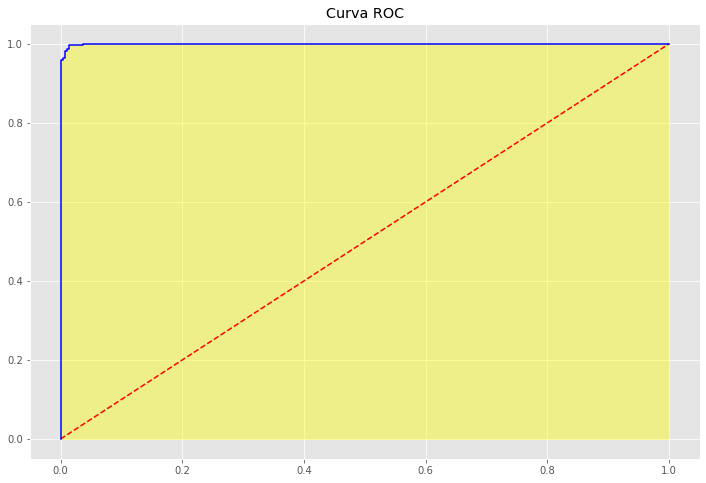

0.9995218731431966

In [43]:
def pinta_curva_roc(modelo,x,y,titulo="Curva ROC",figsize=(12,8)):
    y_test_proba=modelo.predict_proba(x)[:,1] 
    roc_curve(y_true=y,y_score=y_test_proba)
    fpr,tpr,umbrales=roc_curve(y_true=y,y_score=y_test_proba)
    plt.figure(figsize=figsize) #defino figuro
    plt.plot([0,1],[0,1],"r--")
    plt.plot(fpr,tpr,"b-") #asigno variables
    plt.fill_between(fpr,tpr,alpha=0.4, color="yellow")
    plt.title(titulo)
    plt.show()
    return roc_auc_score(y_true=y,y_score=y_test_proba)

pinta_curva_roc(mejor_modelo,X_test,y_test)

<font color='brown'>La curva ROC indica que el modelo es un buen clasificador, siendo el AUC de 0.999.  
Vamos a ver la matriz de confusión:</font>

In [44]:
matriz_confusion=confusion_matrix(y_true=y_test,y_pred=mejor_modelo.predict(X_test))
matriz_confusion

array([[267,   5],
       [  2, 790]], dtype=int64)

In [45]:
error_clasificacion= (7/1064)*100
error_clasificacion

0.6578947368421052

<font color='brown'>La matriz nos indica que se han clasificado los vinos tintos: 267 bien y 5 mal, mientras que los blancos: 790 bien y 2 mal. Comprobamos de nuevo que es un buen clasificador, ya que tiene un error de 0,66%.</font>

# <font color='brown'>3. Modelo regresor que prediga lo mejor posible la calidad de los vinos:</font>

<font color='brown'>Para comenzar, vamos a comprobar si se mantienen los porcentajes con respecto a la nueva label "quality", en train y test. Si se mantuvieran, no realizaremos análisis de outliers.</font>

In [46]:
ds["quality"].value_counts("0")

6    0.436654
5    0.329323
7    0.160902
4    0.038722
8    0.027820
3    0.005639
9    0.000940
Name: quality, dtype: float64

In [47]:
train["quality"].value_counts("0")

6    0.437735
5    0.329652
7    0.157190
4    0.040414
8    0.028665
3    0.005169
9    0.001175
Name: quality, dtype: float64

In [48]:
test["quality"].value_counts("0")

6    0.432331
5    0.328008
7    0.175752
4    0.031955
8    0.024436
3    0.007519
Name: quality, dtype: float64

<font color='brown'>Si que se mantienen, por lo que mantendremos este reparto de train y test, y dejamos los outliers.   
A continuación, vamos a crear las variables objetivo:</font>

In [49]:
y_train_quality=train[train.columns[-3]] 
y_test_quality=test[test.columns[-3]]

<font color='brown'>A continuación, vamos a generar todos nuestros modelos de regresión, cada uno de ellos tendrá un tratamiento diferente de los datos según sus características. Además, realizaremos pipelines con los hiperparámetros a probar en cada modelo y el Grid Search:</font>

<font color='brown'> 3.1. Modelos de Árboles: por sus propias características no necesitan que se seleccionen features ni su estandarización.</font>

- <font color='brown'> Árbol de decisión Regresor</font>

In [50]:
arbol_reg=DTR(random_state=random_state)

grid_arbol_reg={"max_depth":[5,10,20]}

gs_arbol_reg=GridSearchCV(arbol_reg,
                          grid_arbol_reg,
                          cv=5,
                          verbose=1,
                          scoring="r2",
                          n_jobs=-1)

- <font color='brown'> Random Forest Regresor</font>

In [51]:
random_forest_reg=RandomForestRegressor(random_state=random_state)

grid_random_forest_reg={"max_depth":[5,10]}

gs_random_forest_reg=GridSearchCV(random_forest_reg,
                                  grid_random_forest_reg,
                                  cv=5,
                                  verbose=1,
                                  scoring="r2",
                                  n_jobs=-1)

<font color='brown'> 3.2. Nearest Neighborgs: crearemos dos modelos regresores, uno sin seleccionador de features y otro con él (SelectKBest). Ambos son sensibles a la estandarización por lo que se incluirá en cada uno de los pipelines un StandardScaler:</font>

- <font color='brown'> Nearest Neighbors Regresor sin seleccionador</font>

In [52]:
neighbors_reg=Pipeline(steps=[("scaler",StandardScaler()),
                              ("knn",KNeighborsRegressor())])

grid_neighbors_reg={"knn__n_neighbors": [3,5,7,9,11],
                    "knn__weights": ["uniform","distance"]}

gs_neighbors_reg=GridSearchCV(neighbors_reg,
                              grid_neighbors_reg,
                              cv=5,
                              verbose=1,
                              scoring="r2",
                              n_jobs=-1)

- <font color='brown'> Nearest Neighborgs Regresor con seleccionador SelectKBest</font>

In [53]:
neighbors_kbest_reg=Pipeline(steps=[("scaler",StandardScaler()),
                                    ("kbest",SelectKBest()),
                                    ("knn",KNeighborsRegressor())])

grid_neigbors_kbest_reg={"kbest__score_func": [f_classif],
                         "kbest__k": [1,2,3],
                         "knn__n_neighbors": [3,5,7,9,11],
                         "knn__weights": ["uniform","distance"]}

gs_neighbors_kbest_reg=GridSearchCV(neighbors_kbest_reg,
                                    grid_neigbors_kbest_reg,
                                    cv=5,
                                    verbose=1,
                                    scoring="r2",
                                    n_jobs=-1)

In [54]:
dict_grid_searchs_reg={"gs_arbol_reg":gs_arbol_reg,
                       "gs_random_forest_reg":gs_random_forest_reg,
                       "gs_neighbors_reg":gs_neighbors_reg,
                       "gs_neighbors_kbest_reg":gs_neighbors_kbest_reg}

In [55]:
for nombre_reg, grid_search_reg in dict_grid_searchs_reg.items():
    print("Haciendo Grid Search de %s..." %nombre_reg)
    grid_search_reg.fit(X_train, y_train_quality)

Haciendo Grid Search de gs_arbol_reg...
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_random_forest_reg...
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Haciendo Grid Search de gs_neighbors_reg...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_neighbors_kbest_reg...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished


In [56]:
best_score_gridsearchs_reg=[(nombre_modelo_reg, grid_search_reg.best_score_) for nombre_modelo_reg, grid_search_reg
                        in dict_grid_searchs_reg.items()]

best_score_gridsearchs_df_reg=pd.DataFrame(best_score_gridsearchs_reg,columns=["GridSearchCV_reg", "Mejor score_r2"])

best_score_gridsearchs_df_reg_ordenado=(best_score_gridsearchs_df_reg.sort_values(by="Mejor score_r2", ascending=False))
best_score_gridsearchs_df_reg_ordenado

,GridSearchCV_reg,Mejor score_r2
2,gs_neighbors_reg,0.338562
1,gs_random_forest_reg,0.333370
0,gs_arbol_reg,0.258332
3,gs_neighbors_kbest_reg,0.224980


In [57]:
mejor_gridsearch_reg=dict_grid_searchs_reg["gs_neighbors_reg"]

mejor_modelo_reg=mejor_gridsearch_reg.best_estimator_
mejor_modelo_reg

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=11, p=2,
                                     weights='distance'))],
         verbose=False)

In [58]:
mejor_modelo_reg.fit(X_train,y_train_quality)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=11, p=2,
                                     weights='distance'))],
         verbose=False)

<font color='brown'>Vamos a comprobar como predice nuestro modelo según las métricas MAE, MSE, RMSE, R2 y MAPE:</font>

In [59]:
def metrica_regresion(X,y,modelo):
    return MAE(y_true=y,y_pred=modelo.predict(X)),MSE(y_true=y,y_pred=modelo.predict(X)), np.sqrt(MSE(y_true=y,y_pred=modelo.predict(X))), r2_score(y_pred=modelo.predict(X),y_true=y)

In [60]:
MAE_,MSE_,RMSE_,R2_=metrica_regresion(X_test,y_test_quality,mejor_modelo_reg)

In [61]:
print ("El MAE es:", MAE_)
print ("El MSE es:", MSE_)
print ("El RMSE es:", RMSE_)
print ("El R2 es:", R2_)

El MAE es: 0.535942856769226
El MSE es: 0.49036770950567066
El RMSE es: 0.7002626003905039
El R2 es: 0.35558451102010546


In [62]:
y_pred=mejor_modelo_reg.predict(X_test)

In [63]:
MAPE=np.mean(np.abs((y_test_quality - y_pred)/y_test_quality))* 100
MAPE

9.688461529038609

<font color='brown'>Como podemos comprobar el error entre las medidas reales y predichas es elevado, siendo el error relativo de 9,69%. Por lo que podemos deducir que un modelo regresor, con estas features, no nos sirve para predecir la calidad de un vino.

En cuanto al R2, como podemos ver, en test y en train es similar, por lo que el modelo no está sobreajustado ni subajustado.

En la siguiente gráfica vamos a ver, visualmente, los errores: </font>

In [64]:
error=y_test_quality-y_pred

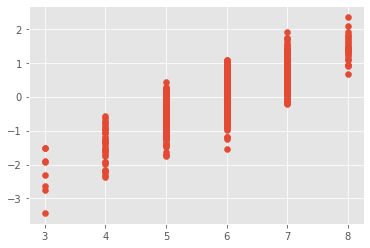

In [65]:
plt.scatter(x=y_test_quality,y=error);

<font color='brown'>Observamos que nuestro modelo subestima para calidades inferiores a la media (5.795677* calculado en el análisis estadístico inicial), y sobre estima las calidades mayores de 7, siendo más preciso en los valores cercanos a la media. Comprobamos que los modelos de regresión no son buenos modelos para predecir la calidad de los vinos. Vamos a realizar la predicción con los modelos de clasificación pero para el target "quality".  
Vamos a comenzar categorizando la calidad entre bueno (mayor o igual a 6) y malo (menor de 6), en nuestros train y test.</font>

In [66]:
ds["calidad"]=pd.cut(x=ds["quality"],bins=[0,5,9],labels=["malo","bueno"],include_lowest=True)

<font color='brown'>Vamos a crear el target numérico y las nuevas variables de target.</font>

In [67]:
le=LabelEncoder()
le.fit(ds["calidad"])
ds["calidad_num"]=le.transform(ds["calidad"])
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,color_num,calidad,calidad_num
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red,0,bueno,0
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white,1,bueno,0
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white,1,bueno,0
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red,0,malo,1
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white,1,malo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,7.50,0.27,0.31,5.8,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5,white,1,malo,1
5316,7.40,0.18,0.30,10.4,0.045,44.0,174.0,0.99660,3.11,0.57,9.7,6,white,1,bueno,0
5317,6.20,0.27,0.49,1.4,0.050,20.0,74.0,0.99310,3.32,0.44,9.8,6,white,1,bueno,0
5318,6.90,0.13,0.28,13.3,0.050,47.0,132.0,0.99655,3.34,0.42,10.1,6,white,1,bueno,0


In [68]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=random_state)
for train_index, test_index in sss.split(ds, ds["color_num"]):
    train = ds.loc[train_index]
    test = ds.loc[test_index]

In [69]:
y_train_calidad_num=train[train.columns[-1]] 
y_test_calidad_num=test[test.columns[-1]]

<font color='brown'>Vamos a usar los mismos modelos que en el apartado 2 de la práctica. Vamos a generar un nuevo diccionario pero utilizando los mismos pipelines y grids search que antes: </font>

In [70]:
dict_grid_searchs_calidad={"gs_arbol_calidad":gs_arbol,
                           "gs_random_forest_calidad":gs_random_forest,
                           "gs_gradient_boosting_calidad":gs_gradient_boosting,
                           "gs_extra_tree_calidad":gs_extra_tree,
                           "gs_logreg_calidad":gs_logreg,
                           "gs_logreg_rfecv_calidad":gs_logreg_rfecv,
                           "gs_neighbors_calidad":gs_neighbors,
                           "gs_neighbors_kbest_calidad":gs_neighbors_kbest,
                           "gs_nb_calidad":gs_nb,
                           "gs_nb_kbest_calidad":gs_nb_kbest}

In [71]:
for nombre_calidad, grid_search_calidad in dict_grid_searchs_calidad.items():
    print("Haciendo Grid Search de %s..." %nombre_calidad)
    grid_search_calidad.fit(X_train, y_train_calidad_num)

Haciendo Grid Search de gs_arbol_calidad...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_random_forest_calidad...
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   28.4s finished


Haciendo Grid Search de gs_gradient_boosting_calidad...
Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 654 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1004 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2004 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2654 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  4.9min finished


Haciendo Grid Search de gs_extra_tree_calidad...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_logreg_calidad...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_logreg_rfecv_calidad...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   18.2s finished
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklea

C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Haciendo Grid Search de gs_neighbors_calidad...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_neighbors_kbest_calidad...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_nb_calidad...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Haciendo Grid Search de gs_nb_kbest_calidad...
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished


In [72]:
best_score_gridsearchs_calidad=[(nombre_modelo_calidad, grid_search_calidad.best_score_) for nombre_modelo_calidad, grid_search_calidad
                        in dict_grid_searchs_calidad.items()]

best_score_gridsearchs_df_calidad=pd.DataFrame(best_score_gridsearchs_calidad,columns=["GridSearchCV_calidad", "Mejor score"])

best_score_gridsearchs_df_calidad_ordenado=(best_score_gridsearchs_df_calidad.sort_values(by="Mejor score", ascending=False))
best_score_gridsearchs_df_calidad_ordenado

,GridSearchCV_calidad,Mejor score
2,gs_gradient_boosting_calidad,0.771147
1,gs_random_forest_calidad,0.766917
3,gs_extra_tree_calidad,0.749530
6,gs_neighbors_calidad,0.742011
4,gs_logreg_calidad,0.741071
5,gs_logreg_rfecv_calidad,0.741071
0,gs_arbol_calidad,0.731203
7,gs_neighbors_kbest_calidad,0.719925
9,gs_nb_kbest_calidad,0.695724
8,gs_nb_calidad,0.682566


<font color='brown'>Ya tenemos un modelo ganador "gs_gradient_boosting_calidad", vamos a comprobar qué hiperparametros han sido los mejores:</font>

In [73]:
mejor_gridsearch_calidad=dict_grid_searchs_calidad["gs_gradient_boosting_calidad"]

mejor_modelo_calidad=mejor_gridsearch_calidad.best_estimator_
mejor_modelo_calidad

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
mejor_modelo_calidad.fit(X_train,y_train_calidad_num)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [75]:
accuracy_en_test_calidad=accuracy_score(y_true=y_test_calidad_num, y_pred=mejor_modelo_calidad.predict(X_test))

print("El modelo tiene un accuracy en el conjunto de test de %s" %accuracy_en_test_calidad)

El modelo tiene un accuracy en el conjunto de test de 0.7612781954887218


<font color='brown'>Hemos obtenido un resultado de Accuracy poco aceptable. Al ser parecido al del train concluimos que no hay indicios de overfitting o underfitting. A continuación, vamos a sacar las métricas de Recall, Precision y F1-Score. A continuación veremos la curva ROC.</font>

In [76]:
print("El modelo tiene un Recall Score en el conjunto de test de:",
      recall_score(y_true=y_test_calidad_num,y_pred=mejor_modelo_calidad.predict(X_test)))
print("El modelo tiene un Precision Score en el conjunto de test de:",
      precision_score(y_true=y_test_calidad_num,y_pred=mejor_modelo_calidad.predict(X_test)))
print("El modelo tiene un F1-Score en el conjunto de test de:",
      f1_score(y_true=y_test_calidad_num,y_pred=mejor_modelo_calidad.predict(X_test)))

El modelo tiene un Recall Score en el conjunto de test de: 0.649616368286445
El modelo tiene un Precision Score en el conjunto de test de: 0.6846361185983828
El modelo tiene un F1-Score en el conjunto de test de: 0.6666666666666667


<font color='brown'>Todas las métricas nos idican que el modelo no predice bien. Vamos a ver la curva ROC que pinta tiene:</font>

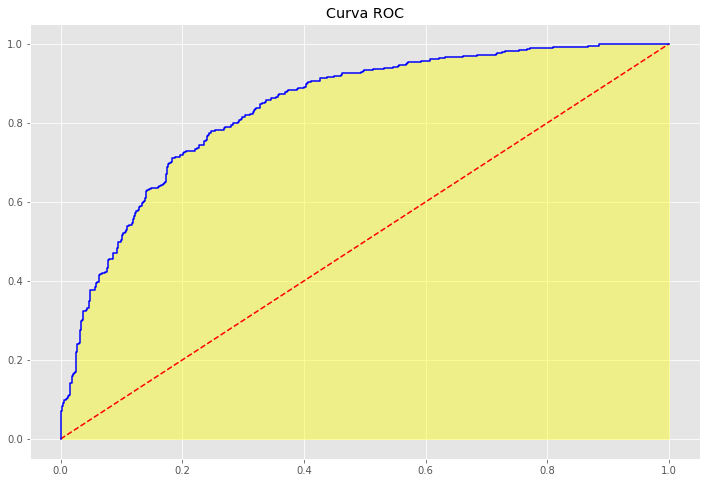

0.8371987854512565

In [77]:
def pinta_curva_roc(modelo,x,y,titulo="Curva ROC",figsize=(12,8)):
    y_test_proba=modelo.predict_proba(x)[:,1] 
    roc_curve(y_true=y,y_score=y_test_proba)
    fpr,tpr,umbrales=roc_curve(y_true=y,y_score=y_test_proba)
    plt.figure(figsize=figsize) #defino figuro
    plt.plot([0,1],[0,1],"r--")
    plt.plot(fpr,tpr,"b-") #asigno variables
    plt.fill_between(fpr,tpr,alpha=0.4, color="yellow")
    plt.title(titulo)
    plt.show()
    return roc_auc_score(y_true=y,y_score=y_test_proba)

pinta_curva_roc(mejor_modelo_calidad,X_test,y_test_calidad_num)

<font color='brown'>La curva ROC indica que el modelo es un mal clasificador.Con un valor AUC de 0.84.   
Comprobemos la matriz de confusión:</font>

In [78]:
matriz_confusion_calidad=confusion_matrix(y_true=y_test_calidad_num,y_pred=mejor_modelo_calidad.predict(X_test))
matriz_confusion_calidad

array([[556, 117],
       [137, 254]], dtype=int64)

In [79]:
error_clasificacion= ((117+137)/1064)*100
error_clasificacion

23.872180451127818

<font color='brown'>La matriz nos indica que se han clasificado los vinos como buenos: 556 bien y 117 mal, mientras que los malos: 254 bien y 137 mal. Comprobamos de nuevo que es un mal clasificador, ya que tiene un error de 23.87%. 
    
Tanto los modelos de regresión como de clasificación no predicen bien la calidad de los vinos. Esto puede ser debido a que las features de las que disponemos no son buenas para predecir este valor. Además, este valor de calidad es subjetivo, ya que es una calificación que pone una persona al vino, lo que puede no estar condicionado por las features que tenemos que hablan sobre las propiedades del vino.</font>